In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error

In [ ]:
'''
Készíts egy függvényt, betölti majd vissza adja az iris adathalmazt.


Egy példa a kimenetre: iris
return type: sklearn.utils.Bunch
függvény neve: load_iris_data
'''

In [2]:
def load_iris_data():
    iris = load_iris()
    return iris

In [ ]:
'''
Készíts egy függvényt, ami a betölti az virágokhoz tartozó levél méretket egy dataframebe, majd az első 5 sort visszaadja.
Minden oszlop tartalmazza, hogy az milyen mérethez tartozik.

Egy példa a bemenetre: iris
Egy példa a kimenetre: iris_df
return type: pandas.core.frame.DataFrame
függvény neve: check_data
'''

In [7]:
def check_data(iris):
    data = iris.data[:, 2:] # A harmadik és negyedik oszlop kiválasztása (petal length és petal width)
    feature_names = iris.feature_names[2:] # A tulajdonságok neveinek kiválasztása
    target_names = iris.target_names # A célok neveinek kiválasztása
    target = iris.target # A célok kiválasztása

    #df
    iris_df = pd.DataFrame(data, columns=feature_names)
    iris_df['target'] = target
    iris_df['target_names'] = iris.target_names[target]

    # Az első 5 sort adja vissza
    return iris_df.head()

In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy lineaáris regressziós model feltanításához.
Featurejeink legyenek a levél méretek kivéve a "sepal length (cm)", ez legyen a targetünk.

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: linear_train_data
'''

In [8]:
def linear_train_data(iris):
    data = iris.data[:, 2:]
    feature_names = iris.feature_names[2:]
    target = iris.data[:, 0]

    # A tulajdonságok és célváltozó átalakítása numpy tömbökké
    X = np.array(data)
    y = np.array(target)

    # A sepal length (cm) eltávolítása a tulajdonságok közül
    X = np.delete(X, 0, axis=1)
    feature_names = np.delete(feature_names, 0)

    #tulajdonságok és a célváltozó numpy tömbökben
    return X, y

In [ ]:
''' 
Készíts egy függvényt ami előkészíti az adatokat egy logisztikus regressziós model feltanításához.
Featurejeink legyenek a levél méretek, targetünk pedig a 0, 1-es virág osztályok.
Fontos csak azokkal az adatokkal tanítsunk amihez tartozik adott target. 

Egy példa a bemenetre: iris
Egy példa a kimenetre: X, y
return type: (numpy.ndarray, numpy.ndarray)
függvény neve: logistic_train_data
'''

In [10]:
def logistic_train_data(iris):
    data = iris.data[:, 2:]
    target = iris.target

    # Az osztálycímkék átalakítása numpy tömbbé
    y = np.array(target)

    # Az összes 0 vagy 1 értékű virágot kiválasztjuk
    mask = np.logical_or(y == 0, y == 1)

    # A tulajdonságok kiválasztása csak azokkal az adatokkal, amelyek a 0 vagy 1 osztályhoz tartoznak
    X = data[mask]
    y = y[mask]

    return X, y

In [ ]:
'''
Készíts egy függvényt ami feldarabolja az adatainkat train és test részre. Az adatok 20%-át használjuk fel a teszteléshez.
Tegyük determenisztikussá a darabolást, ennek értéke legyen 42.

Egy példa a bemenetre: X, y
Egy példa a kimenetre: X_train, X_test, y_train, y_test
return type: (numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)
függvény neve: split_data
'''

In [11]:
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [ ]:
'''
Készíts egy függvényt ami feltanít egy lineáris regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LinearRegression
függvény neve: train_linear_regression
'''

In [12]:
def train_linear_regression(X_train, y_train):
    # Lineáris regressziós modell inicializálása
    model = LinearRegression()

    # A modell betanítása a train adatokkal
    model.fit(X_train, y_train)

    # A függvény visszatér a betanított modell objektummal
    return model

In [ ]:
'''
Készíts egy függvényt ami feltanít egy logisztikus regressziós modelt, majd visszatér vele.

Egy példa a bemenetre: X_train, y_train
Egy példa a kimenetre: model
return type: sklearn.linear_model._base.LogisticRegression
függvény neve: train_logistic_regression
'''

In [13]:
def train_logistic_regression(X_train, y_train):

    model = LogisticRegression()

    model.fit(X_train, y_train)

    return model

In [ ]:
''' 
Készíts egy függvényt, ami a feltanított modellel predikciót tud végre hajtani.

Egy példa a bemenetre: model, X_test
Egy példa a kimenetre: y_pred
return type: numpy.ndarray
függvény neve: predict
'''

In [14]:
def predict(model, X_test):
    # A predikciók elvégzése a X_test adatokon a betanított modell segítségével
    y_pred = model.predict(X_test)

    # A függvény visszatér a predikciók numpy tömbjével
    return y_pred

In [ ]:
'''
Készíts egy függvényt, ami vizualizálni tudja a label és a predikciók közötti eltérést.
Használj scatter plotot a diagram elkészítéséhez.

Diagram címe legyen: 'Actual vs Predicted Target Values'
Az x tengely címe legyen: 'Actual'
Az y tengely címe legyen: 'Predicted'

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: scatter plot
return type: matplotlib.figure.Figure
függvény neve: plot_actual_vs_predicted
'''

In [15]:
def plot_actual_vs_predicted(y_test, y_pred):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(y_test, y_pred)
    ax.set_title('Actual vs Predicted Target Values')
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    return fig



In [ ]:
''' 
Készíts egy függvényt, ami a Négyzetes hiba (MSE) értékét számolja ki a predikciók és a valós értékek között.

Egy példa a bemenetre: y_test, y_pred
Egy példa a kimenetre: mse
return type: float
függvény neve: evaluate_model
'''

In [16]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [22]:
"""
iris = load_iris_data()
#check_data(iris)

#linear
X_linear, y_linear = linear_train_data(iris)

#split
X_train, X_test, y_train, y_test = split_data(X_linear, y_linear)

#train
model = train_linear_regression(X_train, y_train)

#predict
y_pred = predict(model, X_test)

#plot
#plot_actual_vs_predicted(y_test, y_pred)

#evaluate
mse = evaluate_model(y_test, y_pred)
print(mse)
"""



0.16679303571495843


0.0


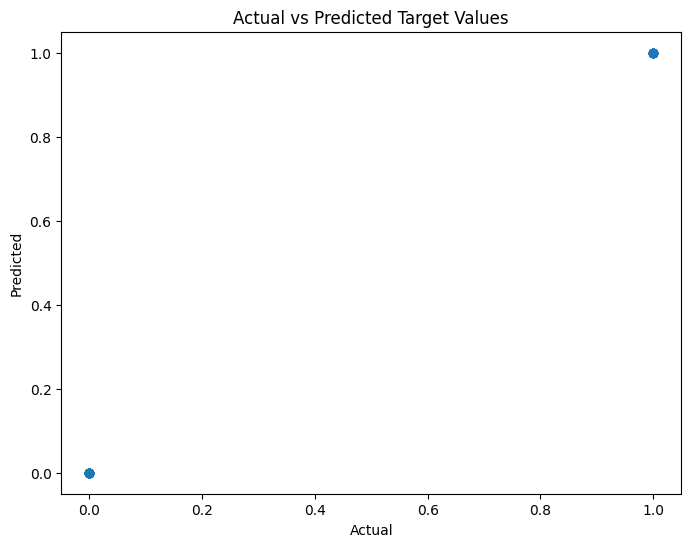

In [24]:
"""iris = load_iris_data()

#logistic
X_logistic, y_logistic = logistic_train_data(iris)

#split
X_train, X_test, y_train, y_test = split_data(X_logistic, y_logistic)

#train
model = train_logistic_regression(X_train, y_train)

#predict
y_pred = predict(model, X_test)

#plot
plot_actual_vs_predicted(y_test, y_pred)

#evaluate
mse = evaluate_model(y_test, y_pred)
print(mse)"""